In [1]:
import tensorflow as tf
import ipywidgets
import pandas as pd
import numpy as np

2023-07-19 15:58:03.102296: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-07-19 15:58:03.124530: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-19 15:58:03.539342: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


2023-07-19 15:58:03.972569: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-07-19 15:58:03.985838: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-07-19 15:58:03.985867: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.


In [3]:
import random
import os

os.environ['PYTHONHASHSEED'] = '36'
np.random.seed(36)
random.seed(36)
tf.random.set_seed(36)

In [4]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession
config = ConfigProto()
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

2023-07-19 15:58:04.001858: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-07-19 15:58:04.001902: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-07-19 15:58:04.001913: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-07-19 15:58:04.391738: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-07-19 15:58:04.391877: I tensorflow/compile

In [5]:
#gpus = tf.config.experimental.list_physical_devices('GPU')
#for gpu in gpus:
#    tf.config.experimental.set_memory_growth(gpu, True)

In [6]:
import tensorflow_datasets as tfds
from matplotlib import pyplot as plt

In [7]:
df = tfds.load('stanford_dogs',split='train')

2023-07-19 15:58:04.791603: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-07-19 15:58:04.791654: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-07-19 15:58:04.791666: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-07-19 15:58:04.791886: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-07-19 15:58:04.791898: I tensorflow/core/co

In [8]:
# Setup connection aka iterator
dataIterator = df.as_numpy_iterator()

2023-07-19 15:58:04.836938: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_2' with dtype string and shape [4]
	 [[{{node Placeholder/_2}}]]
2023-07-19 15:58:04.837108: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [4]
	 [[{{node Placeholder/_0}}]]


In [9]:
# Getting data out of the pipeline
dataIterator.next()

{'image': array([[[14, 14, 14],
         [14, 14, 14],
         [14, 14, 14],
         ...,
         [19, 17, 20],
         [19, 17, 20],
         [19, 17, 20]],
 
        [[14, 14, 14],
         [14, 14, 14],
         [14, 14, 14],
         ...,
         [19, 17, 20],
         [19, 17, 20],
         [19, 17, 20]],
 
        [[14, 14, 14],
         [14, 14, 14],
         [14, 14, 14],
         ...,
         [19, 17, 20],
         [19, 17, 20],
         [19, 17, 20]],
 
        ...,
 
        [[19, 19, 19],
         [18, 18, 18],
         [18, 18, 18],
         ...,
         [23, 21, 22],
         [24, 22, 23],
         [24, 22, 23]],
 
        [[19, 19, 19],
         [18, 18, 18],
         [18, 18, 18],
         ...,
         [22, 20, 21],
         [22, 20, 21],
         [23, 21, 22]],
 
        [[19, 19, 19],
         [18, 18, 18],
         [18, 18, 18],
         ...,
         [21, 19, 20],
         [21, 19, 20],
         [22, 20, 21]]], dtype=uint8),
 'image/filename': b'Images/n0209

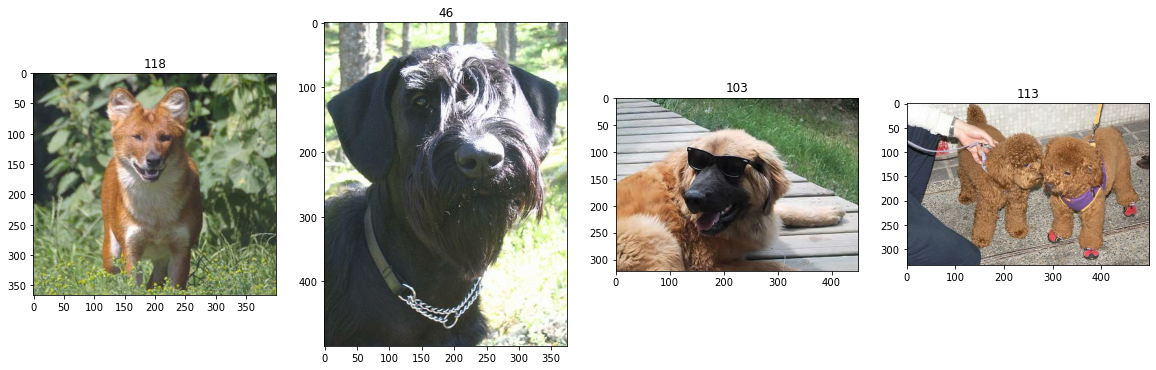

In [10]:
# Setup subplot formatting
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
# Loop four times and get images
for idx in range(4):
    # Grab an image and label
    sample = dataIterator.next()
    # plot the image using a specific subplot
    ax[idx].imshow(np.squeeze(sample['image']))
    # Appending the image label as the plot title
    ax[idx].title.set_text(sample['label'])

In [39]:
# Scale and return images only
def scale_images(data):
    image=data['image']
    image = tf.image.resize(image, [224,224])
    image = tf.image.rgb_to_grayscale(image)
    return image/255

In [40]:
from tqdm import tqdm
import time
for i in tqdm(range(100)):
    time.sleep(0.01)
    # Reload dataset
    df = tfds.load('stanford_dogs',split='train')
    # Running the dataset through the scale_images preprocesing step
    df = df.map(scale_images)
    # Cahce the dataset for that batch
    df = df.cache()
    # Shuffle it up
    df = df.shuffle(60000)
    # Batch into 128 images per sample
   # df = df.batch(128)
    # reduces the likelihood of bottlenecking
    #df = df.prefetch(64)

100%|█████████████████████████████████████████████████████████████████████████████████| 100/100 [00:03<00:00, 26.08it/s]


In [13]:
df.as_numpy_iterator().next().shape

2023-07-19 15:58:08.714863: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [4]
	 [[{{node Placeholder/_0}}]]
2023-07-19 15:58:08.715359: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype string and shape [4]
	 [[{{node Placeholder/_1}}]]


(128, 224, 224, 1)

In [41]:
# Bring in sequenital api fro the generator and discriminator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Flatten, Reshape, LeakyReLU, Dropout, UpSampling2D

In [42]:
def build_generator():
    model = Sequential()
    # Takes in random values and reshapes it to 56x56x128
    # Beginnings of a generated image
    model.add(Dense(56*56*128, input_dim=128))
    model.add(LeakyReLU(0.2))
    model.add(Reshape((56,56,128)))
    
    # Upsampling block 1
    model.add(UpSampling2D())
    model.add(Conv2D(128,5, padding='same'))
    model.add(LeakyReLU(0.2))
    
    # Upsampling block 2
    model.add(UpSampling2D())
    model.add(Conv2D(128,5, padding='same'))
    model.add(LeakyReLU(0.2))
    
    # Conv block 1
    model.add(Conv2D(128,4,padding='same'))
    model.add(LeakyReLU(0.2))
    
    # Conv block 2
    model.add(Conv2D(128,4,padding='same'))
    model.add(LeakyReLU(0.2))
    
    # Conv layer to get to one channel
    model.add(Conv2D(1,4,padding='same',activation='sigmoid'))

    return model

In [43]:
generator = build_generator()

In [44]:
generator.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 401408)            51781632  
                                                                 
 leaky_re_lu_9 (LeakyReLU)   (None, 401408)            0         
                                                                 
 reshape_1 (Reshape)         (None, 56, 56, 128)       0         
                                                                 
 up_sampling2d_2 (UpSampling  (None, 112, 112, 128)    0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 112, 112, 128)     409728    
                                                                 
 leaky_re_lu_10 (LeakyReLU)  (None, 112, 112, 128)     0         
                                                      

1/1 [==============================] - 0s 41ms/step


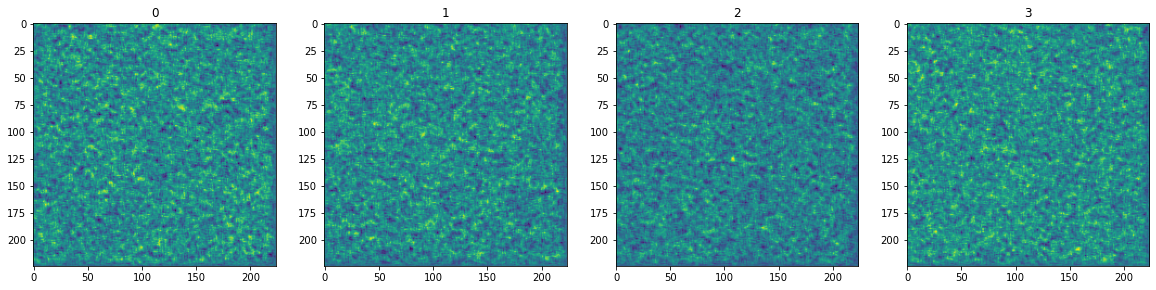

In [45]:
# Generate new image
img = generator.predict(np.random.randn(4,128,1))
# Setup subplot formatting
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
# Loop four times and get images
for idx,img in enumerate(img):
    # plot the image using a specific subplot
    ax[idx].imshow(np.squeeze(img))
    # Appending the image label as the plot title
    ax[idx].title.set_text(idx)

In [46]:
def build_discriminator():
    model = Sequential()
    
    # First Conv block
    model.add(Conv2D(32,5, input_shape = (224,224,1)))
    model.add(LeakyReLU(0.2))
    model.add(Dropout(0.4))
    
    # Second Conv block
    model.add(Conv2D(64,5))
    model.add(LeakyReLU(0.2))
    model.add(Dropout(0.4))
    
    # Third Conv block
    model.add(Conv2D(128,5))
    model.add(LeakyReLU(0.2))
    model.add(Dropout(0.4))
    
    # Fourth Conv block
    model.add(Conv2D(256,5))
    model.add(LeakyReLU(0.2))
    model.add(Dropout(0.4))
    
    # Flatten then pass to dense layer
    model.add(Flatten())
    model.add(Dropout(0.4))
    model.add(Dense(1, activation='sigmoid'))
    
    return model

In [47]:
discriminator = build_discriminator()

In [48]:
discriminator.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 220, 220, 32)      832       
                                                                 
 leaky_re_lu_14 (LeakyReLU)  (None, 220, 220, 32)      0         
                                                                 
 dropout_5 (Dropout)         (None, 220, 220, 32)      0         
                                                                 
 conv2d_15 (Conv2D)          (None, 216, 216, 64)      51264     
                                                                 
 leaky_re_lu_15 (LeakyReLU)  (None, 216, 216, 64)      0         
                                                                 
 dropout_6 (Dropout)         (None, 216, 216, 64)      0         
                                                                 
 conv2d_16 (Conv2D)          (None, 212, 212, 128)    

In [49]:
img = generator.predict(np.random.randn(4,128,1))
img.shape

1/1 [==============================] - 0s 10ms/step


(4, 224, 224, 1)

In [50]:
img = img[0]

In [51]:
img.shape

(224, 224, 1)

In [52]:
# If img is single image use this otherwise just use discriminator.predict(img)
discriminator.predict(np.expand_dims(img,0))

1/1 [==============================] - 0s 36ms/step


array([[0.5050834]], dtype=float32)

Setup Losses and Optimizers

In [53]:
# Adam is the optimizer for both
from tensorflow.keras.optimizers import Adam
# Binary cross entropy is going to be the loss for both
from tensorflow.keras.losses import BinaryCrossentropy

In [54]:
# Set discrimnator to slower learning rate than generator
g_opt = Adam(learning_rate=0.0001)
d_opt = Adam(learning_rate=0.00001)
g_loss = BinaryCrossentropy()
d_loss = BinaryCrossentropy()

Setup Subclassed Model

In [55]:
# Importing the base model class to subclass our training step
from tensorflow.keras.models import Model

In [56]:
class PetGAN(Model): 
    def __init__(self, generator, discriminator, *args, **kwargs):
        # Pass through args and kwargs to base class 
        super().__init__(*args, **kwargs)
        
        # Create attributes for gen and disc
        self.generator = generator 
        self.discriminator = discriminator 
        
    def compile(self, g_opt, d_opt, g_loss, d_loss, *args, **kwargs): 
        # Compile with base class
        super().compile(*args, **kwargs)
        
        # Create attributes for losses and optimizers
        self.g_opt = g_opt
        self.d_opt = d_opt
        self.g_loss = g_loss
        self.d_loss = d_loss 

    def train_step(self, batch):
        # Get the data 
        real_images = batch
        fake_images = self.generator(tf.random.normal((128, 128, 1)), training=False)
        
        # Train the discriminator
        with tf.GradientTape() as d_tape: 
            # Pass the real and fake images to the discriminator model
            yhat_real = self.discriminator(real_images, training=True) 
            yhat_fake = self.discriminator(fake_images, training=True)
            yhat_realfake = tf.concat([yhat_real, yhat_fake], axis=0)
            
            # Create labels for real and fakes images
            y_realfake = tf.concat([tf.zeros_like(yhat_real), tf.ones_like(yhat_fake)], axis=0)
            
            # Add some noise to the TRUE outputs
            noise_real = 0.15*tf.random.uniform(tf.shape(yhat_real))
            noise_fake = -0.15*tf.random.uniform(tf.shape(yhat_fake))
            y_realfake += tf.concat([noise_real, noise_fake], axis=0)
            
            # Calculate loss - BINARYCROSS 
            total_d_loss = self.d_loss(y_realfake, yhat_realfake)
            
        # Apply backpropagation - nn learn 
        dgrad = d_tape.gradient(total_d_loss, self.discriminator.trainable_variables) 
        self.d_opt.apply_gradients(zip(dgrad, self.discriminator.trainable_variables))
        
        # Train the generator 
        with tf.GradientTape() as g_tape: 
            # Generate some new images
            gen_images = self.generator(tf.random.normal((128,128,1)), training=True)
                                        
            # Create the predicted labels
            predicted_labels = self.discriminator(gen_images, training=False)
                                        
            # Calculate loss - trick to training to fake out the discriminator
            total_g_loss = self.g_loss(tf.zeros_like(predicted_labels), predicted_labels) 
            
        # Apply backprop
        ggrad = g_tape.gradient(total_g_loss, self.generator.trainable_variables)
        self.g_opt.apply_gradients(zip(ggrad, self.generator.trainable_variables))
        
        return {"d_loss":total_d_loss, "g_loss":total_g_loss}

In [62]:
#Create instance of subclass model
petgan = PetGAN(generator, discriminator)

In [63]:
# Compile the model
petgan.compile(g_opt, d_opt, g_loss, d_loss)

Build Callback

In [59]:
import os
from tensorflow.keras.preprocessing.image import array_to_img
from tensorflow.keras.callbacks import Callback

In [60]:
class ModelMonitor(Callback):
    def __init__(self, num_img=3, latent_dim=128):
        self.num_img = num_img
        self.latent_dim = latent_dim

    def on_epoch_end(self, epoch, logs=None):
        random_latent_vectors = tf.random.uniform((self.num_img, self.latent_dim,1))
        generated_images = self.model.generator(random_latent_vectors)
        generated_images *= 255
        generated_images.numpy()
        for i in range(self.num_img):
            img = array_to_img(generated_images[i])
            img.save(os.path.join('images', f'generated_img_{epoch}_{i}.png'))

In [64]:
# Recommend 2000
hist = PetGAN.fit(df, epochs=20, callbacks=[ModelMonitor()])

AttributeError: '_ShuffleDataset' object has no attribute '_assert_compile_was_called'